# Module 2: Example of multiclass classifiers

In this notebook, we will use the `OneVsOneClassifier` and the `OneVsRestClassifier` classes, which allow us to deal with multi-class problems from a binary point of view, to classify the instances in the Iris flower dataset.

These are `wrappers` and we still need to specify the model we want to use. In this case, we will use a scalar product based linear classifier (i.e. `Perceptron`).

Note that the Iris flower dataset has 3 classes, and we have performed all the previous examples without any special consideration. That is because, as we saw in the first notebook (Naive Bayes), up until now, `scikit-learn` has dealt automatically with this problem for us. 

However, in this example we will see some strategies to deal with multi-class problems from a binary point of view.

Let's import the required classes:

In [ ]:
# Import packages
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100,)
xtest shape:  (50, 4)
ytest shape:  (50,)


First of all, we'll try the `Perceptron` dealing with the multiclass problem directly, that is, without any further strategy.

In [ ]:
model = Perceptron(random_state=6)

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=6, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Una vegada tenim el model entrenat, el fem servir per trobar les prediccions del conjunt de test:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

Com que ja tenim les prediccions, podem utilitzar la matriu de confussió a fi de comprovar com es comporta el model:

Text(89.18, 0.5, 'Predicted')

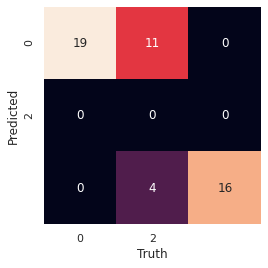

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Note how the model missclassified 11+4 instances. How could we improve these results? An option would be to try the multiclass strategies that we already know: `OneVsOne` and `OneVsRest`. 

Let's try with `OneVsOne` first.

In [ ]:
model = OneVsOneClassifier(estimator=Perceptron(random_state=6))

We can now train the model:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

OneVsOneClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                        early_stopping=False, eta0=1.0,
                                        fit_intercept=True, max_iter=1000,
                                        n_iter_no_change=5, n_jobs=None,
                                        penalty=None, random_state=6,
                                        shuffle=True, tol=0.001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
                   n_jobs=None)

And once trained, predict the labels for the test set:

In [ ]:
# Predict Output 
pred = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(89.18, 0.5, 'Predicted')

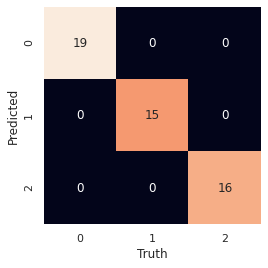

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Notice how we were able to reduce the error to 0 just by using a multiclass strategy.

Let's now see how the second strategy, `OneVsRest`, works. To do that, we'll need to create the corresponding `wrapper` to `OneVsRestClassifier` with the `Perceptron` as estimator.

In [ ]:
model = OneVsRestClassifier(estimator=Perceptron(random_state=6))

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=1000,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty=None, random_state=6,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False),
                    n_jobs=None)

In [ ]:
# Predict Output 
pred = model.predict(xtest)

Text(89.18, 0.5, 'Predicted')

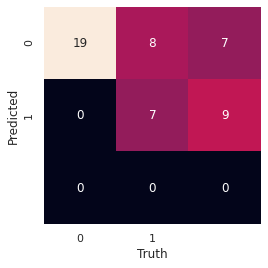

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Note that some times one strategy will work better than the other.